In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("SYB66_246_202310_Population Growth, Fertility and Mortality Indicators.csv",
                 encoding='latin1',skiprows=1)
df

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2010,Population annual rate of increase (percent),1.3,NaN,"United Nations Population Division, New York, ..."
1,1,"Total, all countries or areas",2010,Total fertility rate (children per women),2.6,NaN,"United Nations Population Division, New York, ..."
2,1,"Total, all countries or areas",2010,"Infant mortality for both sexes (per 1,000 liv...",37.1,NaN,"United Nations Statistics Division, New York, ..."
3,1,"Total, all countries or areas",2010,"Maternal mortality ratio (deaths per 100,000 p...",254,NaN,"World Health Organization (WHO), the United Na..."
4,1,"Total, all countries or areas",2010,Life expectancy at birth for both sexes (years),70.1,NaN,"United Nations Population Division, New York, ..."
...,...,...,...,...,...,...,...
6751,722,SIDS,2022,Total fertility rate (children per women),2.3,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
6752,722,SIDS,2022,"Infant mortality for both sexes (per 1,000 liv...",27.3,Projected estimate (medium fertility variant).,"United Nations Statistics Division, New York, ..."
6753,722,SIDS,2022,Life expectancy at birth for both sexes (years),72.5,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
6754,722,SIDS,2022,Life expectancy at birth for males (years),69.6,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."


In [7]:
# Proporción de datos faltantes
df.isna().sum()/df.shape[0]

Region/Country/Area    0.00000
Unnamed: 1             0.00000
Year                   0.00000
Series                 0.00000
Value                  0.00000
Footnotes              0.62611
Source                 0.00000
dtype: float64

In [8]:
# 'Footnotes' es la única que tiene datos faltantes, la revisamos
df["Footnotes"].value_counts()

Footnotes
Projected estimate (medium fertility variant).                                                                                                                                                                                  1224
For statistical purposes, the data for France do not include this area.                                                                                                                                                          132
For statistical purposes, the data for United Kingdom do not include this area.                                                                                                                                                   84
For statistical purposes, the data for France do not include this area.;Projected estimate (medium fertility variant).                                                                                                            66
For statistical purposes, the data for United States of America do not inc

<Axes: xlabel='Footnotes'>

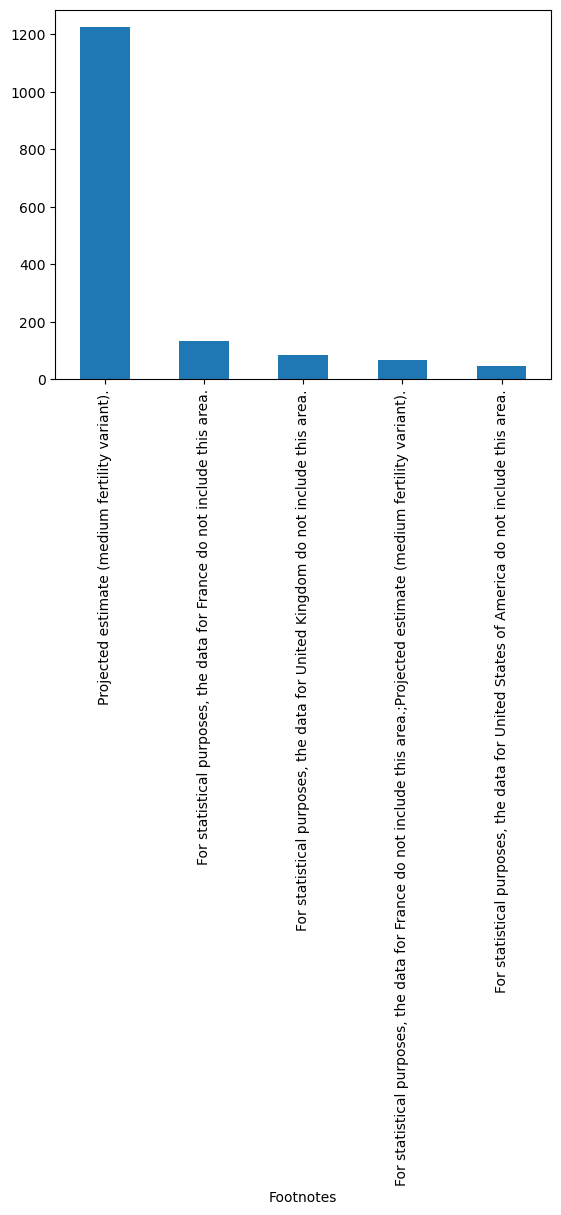

In [12]:
df["Footnotes"].value_counts().head().plot.bar()

In [13]:
# Projected estimate (medium fertility variant) es el valor más frecuente (1224) en Footnotes
# Reemplazamos los NaNs del df con estos valores
df['Footnotes'].fillna(df['Footnotes'].value_counts().index[0],inplace=True)
df.isna().sum()/df.shape[0] # Ya no hay valores faltantes

Region/Country/Area    0.0
Unnamed: 1             0.0
Year                   0.0
Series                 0.0
Value                  0.0
Footnotes              0.0
Source                 0.0
dtype: float64

In [14]:
df.rename(columns = {'Unnamed: 1': 'Country'}, inplace=True) # La columna 'Unnamed: 1' no son más que países
df

,Region/Country/Area,Country,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2010,Population annual rate of increase (percent),1.3,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
1,1,"Total, all countries or areas",2010,Total fertility rate (children per women),2.6,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
2,1,"Total, all countries or areas",2010,"Infant mortality for both sexes (per 1,000 liv...",37.1,Projected estimate (medium fertility variant).,"United Nations Statistics Division, New York, ..."
3,1,"Total, all countries or areas",2010,"Maternal mortality ratio (deaths per 100,000 p...",254,Projected estimate (medium fertility variant).,"World Health Organization (WHO), the United Na..."
4,1,"Total, all countries or areas",2010,Life expectancy at birth for both sexes (years),70.1,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
...,...,...,...,...,...,...,...
6751,722,SIDS,2022,Total fertility rate (children per women),2.3,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
6752,722,SIDS,2022,"Infant mortality for both sexes (per 1,000 liv...",27.3,Projected estimate (medium fertility variant).,"United Nations Statistics Division, New York, ..."
6753,722,SIDS,2022,Life expectancy at birth for both sexes (years),72.5,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
6754,722,SIDS,2022,Life expectancy at birth for males (years),69.6,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."


In [15]:
df["Series"].value_counts() # Valores de la categoría 'series' (donde están las variables que queremos analizar)

Series
Population annual rate of increase (percent)                1019
Total fertility rate (children per women)                   1016
Infant mortality for both sexes (per 1,000 live births)     1016
Life expectancy at birth for both sexes (years)             1016
Life expectancy at birth for males (years)                  1016
Life expectancy at birth for females (years)                1016
Maternal mortality ratio (deaths per 100,000 population)     657
Name: count, dtype: int64

In [16]:
df2 = df[df["Year"]==2020] # Seleccionamos los datos del 2020 (los que queremos analizar)
df2["Series"].value_counts() # Valores de la categoría 'series' para el año 2020

Series
Maternal mortality ratio (deaths per 100,000 population)    219
Population annual rate of increase (percent)                218
Total fertility rate (children per women)                   218
Infant mortality for both sexes (per 1,000 live births)     218
Life expectancy at birth for both sexes (years)             218
Life expectancy at birth for males (years)                  218
Life expectancy at birth for females (years)                218
Name: count, dtype: int64

In [17]:
# La categoría 'Maternal mortality ratio' cuenta con un valor demás, después nos encargamos de eso
# Vamos a trabajar con las demás variables que tienen la misma cantidad de valores (218)

df3 = pd.DataFrame(columns=[np.unique(df2["Series"].values)])

annual_pop = df2[df2["Series"] == "Population annual rate of increase (percent)"]["Value"]
fertility_rate = df2[df2["Series"] == "Total fertility rate (children per women)"]["Value"]
infant_mortality = df2[df2["Series"] == "Infant mortality for both sexes (per 1,000 live births)"]["Value"]
life_expectancy_both = df2[df2["Series"] == "Life expectancy at birth for both sexes (years)"]["Value"]
life_expectancy_male = df2[df2["Series"] == "Life expectancy at birth for males (years)"]["Value"]
life_expectancy_female = df2[df2["Series"] == "Life expectancy at birth for females (years)"]["Value"]

# Tras varias corridas noté que eran strings, las convertí a float para sacar medidas estadísticas y para la correlación
# Agregué valores NaN al final de todas las columnas menos 'maternal mortality ratio'
# Esos valores los modificaré con la mediana de cada variable
df3["Population annual rate of increase (percent)"] = np.append(annual_pop.values.astype(float), [np.NaN])
df3["Total fertility rate (children per women)"] = np.append(fertility_rate.values.astype(float), [np.NaN])
df3["Infant mortality for both sexes (per 1,000 live births)"] = np.append(infant_mortality.values.astype(float), [np.NaN])
df3["Life expectancy at birth for both sexes (years)"] = np.append(life_expectancy_both.values.astype(float), [np.NaN])
df3["Life expectancy at birth for males (years)"] = np.append(life_expectancy_male.values.astype(float), [np.NaN])
df3["Life expectancy at birth for females (years)"] = np.append(life_expectancy_female.values.astype(float), [np.NaN])
df3

,"Infant mortality for both sexes (per 1,000 live births)",Life expectancy at birth for both sexes (years),Life expectancy at birth for females (years),Life expectancy at birth for males (years),"Maternal mortality ratio (deaths per 100,000 population)",Population annual rate of increase (percent),Total fertility rate (children per women)
0,28.3,72.0,74.8,69.4,NaN,0.9,2.3
1,46.4,62.2,64.2,60.3,NaN,2.4,4.4
2,22.6,71.2,73.6,69.0,NaN,1.8,3.1
3,50.0,60.3,62.2,58.4,NaN,2.6,4.7
4,38.3,63.7,66.3,61.2,NaN,2.6,4.3
...,...,...,...,...,...,...,...
214,36.8,61.1,63.9,58.1,NaN,2.1,3.5
215,37.7,64.1,66.8,61.4,NaN,2.5,4.0
216,42.6,64.5,66.8,62.3,NaN,2.4,4.0
217,29.0,72.2,75.4,69.3,NaN,0.9,2.3


In [18]:
# Obtuve los valores de Maternal mortality ratio, como había uno de mil (1,000) quité la coma para después volverlo float igual
maternal_mortality = df2[df2["Series"] == "Maternal mortality ratio (deaths per 100,000 population)"]["Value"]
maternal_mortality = maternal_mortality.str.replace(',', '')

# Obtengo la mediana (redondeada) del resto de variables para agregarla al final de cada variable
# Y ahora sí puedo agregar la variable de mortalidad materna (ya que tiene 1 elemento más que las otras antes de esto)
# Se usa 'nanmedian' porque hay valores nan incluidos (a propósito)
annual_pop_median = np.round(np.nanmedian(df3["Population annual rate of increase (percent)"].values),1)
fertility_rate_median = np.round(np.nanmedian(df3["Total fertility rate (children per women)"].values),1)
infant_mortality_median = np.round(np.nanmedian(df3["Infant mortality for both sexes (per 1,000 live births)"].values),1)
life_expectancy_both_median = np.round(np.nanmedian(df3["Life expectancy at birth for both sexes (years)"].values),1)
life_expectancy_male_median = np.round(np.nanmedian(df3["Life expectancy at birth for males (years)"].values),1)
life_expectancy_female_median = np.round(np.nanmedian(df3["Life expectancy at birth for females (years)"].values),1)

# Modifico esos nans por la mediana de cada variable
df3.iloc[218,5]=annual_pop_median
df3.iloc[218,6]=fertility_rate_median
df3.iloc[218,0]=infant_mortality_median
df3.iloc[218,1]=life_expectancy_both_median
df3.iloc[218,3]=life_expectancy_male_median
df3.iloc[218,2]=life_expectancy_female_median

# Ya puedo agregar la columna de 'maternal mortality'
df3["Maternal mortality ratio (deaths per 100,000 population)"] = maternal_mortality.values.astype(float)
df3

,"Infant mortality for both sexes (per 1,000 live births)",Life expectancy at birth for both sexes (years),Life expectancy at birth for females (years),Life expectancy at birth for males (years),"Maternal mortality ratio (deaths per 100,000 population)",Population annual rate of increase (percent),Total fertility rate (children per women)
0,28.3,72.0,74.8,69.4,223.0,0.9,2.3
1,46.4,62.2,64.2,60.3,487.0,2.4,4.4
2,22.6,71.2,73.6,69.0,103.0,1.8,3.1
3,50.0,60.3,62.2,58.4,545.0,2.6,4.7
4,38.3,63.7,66.3,61.2,351.0,2.6,4.3
...,...,...,...,...,...,...,...
214,36.8,61.1,63.9,58.1,135.0,2.1,3.5
215,37.7,64.1,66.8,61.4,357.0,2.5,4.0
216,42.6,64.5,66.8,62.3,368.0,2.4,4.0
217,29.0,72.2,75.4,69.3,377.0,0.9,2.3


<Axes: xlabel='None', ylabel='None'>

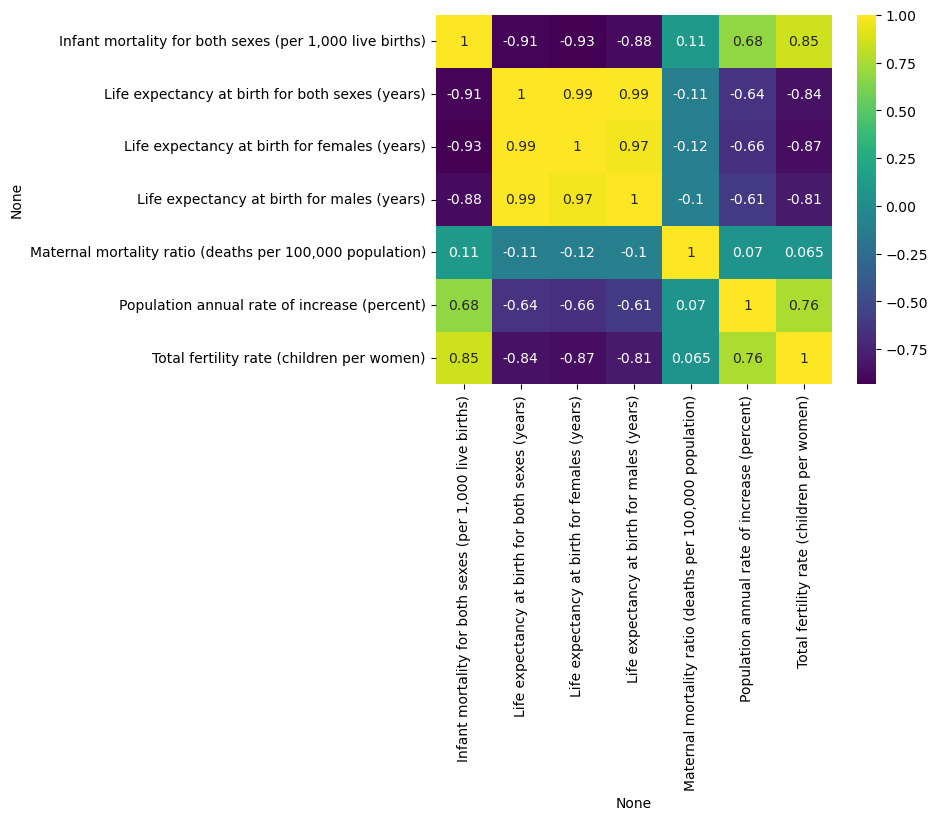

In [19]:
sns.heatmap(df3.corr(), annot=True, cmap="viridis")

La mayoría de las variables están altamente correlacionadas. Sin embargo, la variable de tasa de mortalidad materna no lo está tanto con casi ninguna otra variable. No obstante, para evitar caer en redundancias o sesgos, nos enfocaremos en las correlaciones cuyo valor absoluto se halle entre 0.8 y 0.95. Esto se debe a que algunas variables son circulares en sus relaciones. Por ejemplo, la correlación de la esperanza de vida para ambos sexos con la esperanza de vida para sexo femenino es la misma para sexo masculino, además de que no nos revela tanta información como la harían las otras variables como la tasa de mortalidad, fertilidad o la tasa de crecimiento poblacional anual. Una vez explicado esto, revisaremos primero la relación que se nos solicita (entre tasa de mortalidad infantil y la esperanza de vida para ambos sexos.

In [20]:
df3.columns = ['Infant mortality (per 1000 live births)',
               'Life expectancy (both sexes)',
               'Life expectancy (females)',
               'Life expectancy (males)',
               'Maternal mortality ratio',
               'Population annual rate of increase',
               'Total fertility rate'] # Agregué esto porque las columnas se volvieron tuplas.
df3.columns

Index(['Infant mortality (per 1000 live births)',
       'Life expectancy (both sexes)', 'Life expectancy (females)',
       'Life expectancy (males)', 'Maternal mortality ratio',
       'Population annual rate of increase', 'Total fertility rate'],
      dtype='object')

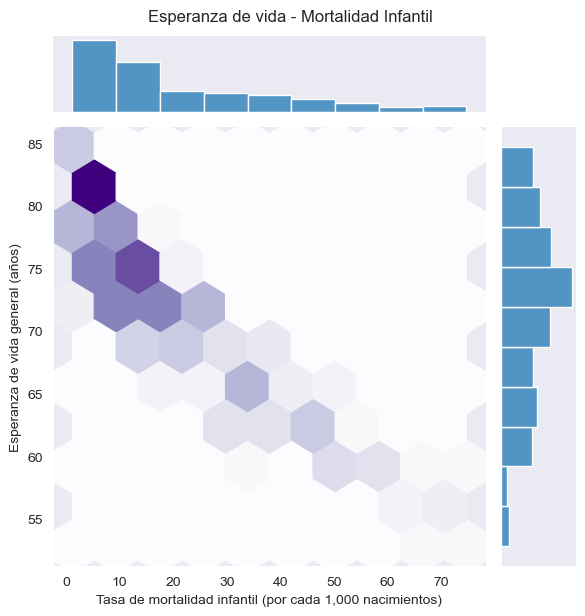

In [21]:
sns.set_style("dark")
graf1 = sns.jointplot(data=df3, x="Infant mortality (per 1000 live births)",
                      y="Life expectancy (both sexes)", kind="hex", cmap="Purples") # Modifiqué también el color
graf1.set_axis_labels(xlabel="Tasa de mortalidad infantil (por cada 1,000 nacimientos)",
                      ylabel="Esperanza de vida general (años)")
graf1.fig.suptitle("Esperanza de vida - Mortalidad Infantil", y=1.02)
plt.show(graf1)

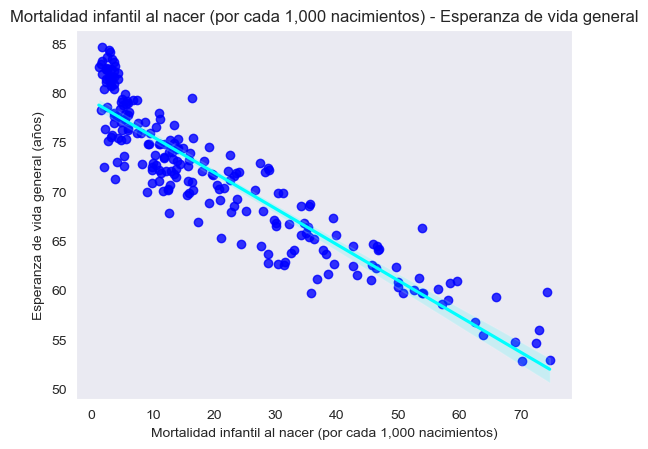

In [22]:
ax = sns.regplot(data=df3, x='Infant mortality (per 1000 live births)', y='Life expectancy (both sexes)',
                scatter_kws={"color": "blue"}, line_kws={"color": "cyan"})
ax.set_ylabel("Esperanza de vida general (años)")
ax.set_xlabel("Mortalidad infantil al nacer (por cada 1,000 nacimientos)")
ax.set_title("Mortalidad infantil al nacer (por cada 1,000 nacimientos) - Esperanza de vida general")
plt.show()

Este último gráfico sirve para ilustrar nuevamente lo que ya se había observado en el gráfico anterior. Notamos que las variables de mortalidad infantil al nacer por cada mil nacimientos y la esperanza de vida para ambos sexos (en años) están estrechamente relacionadas, ya que si la mortalidad infantil al nacer aumenta, la esperanza de vida se reduce. Esto quiere decir que, además de estar fuertemente relacionadas, concluimos que si aumentan las defunciones de niños por cada mil nacimientos vivos registrados (durante su primer año de vida), la esperanza de vida general para la población en general disminuirá.

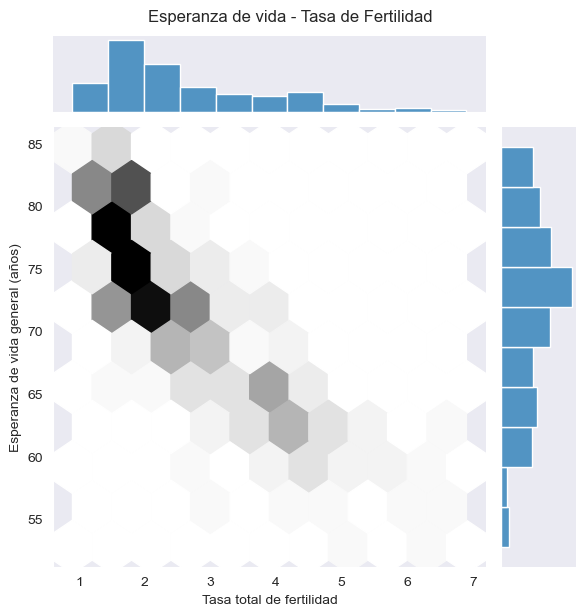

In [23]:
graf2 = sns.jointplot(data=df3, x="Total fertility rate",
                      y="Life expectancy (both sexes)", kind="hex", cmap="Greys") # Modifiqué también el color
graf2.set_axis_labels(xlabel="Tasa total de fertilidad",
                      ylabel="Esperanza de vida general (años)")
graf2.fig.suptitle("Esperanza de vida - Tasa de Fertilidad", y=1.02)
plt.show(graf2)

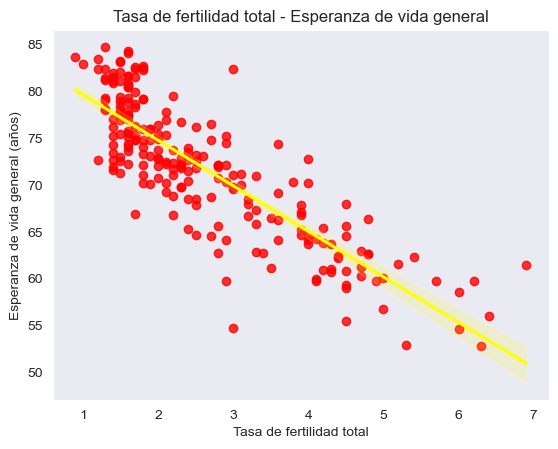

In [25]:
ax = sns.regplot(data=df3, x="Total fertility rate", y='Life expectancy (both sexes)',
                scatter_kws={"color": "red"}, line_kws={"color": "yellow"})
ax.set_ylabel("Esperanza de vida general (años)")
ax.set_xlabel("Tasa de fertilidad total")
ax.set_title("Tasa de fertilidad total - Esperanza de vida general")
plt.show()

En los dos gráficos anteriores, notamos un fenómeno similar al observado en el análisis de mortalidad infantil y esperanza de vida en general. A pesar de contar con una correlación menor a la que tenía la variable de mortalidad infantil, la tasa de fertilidad también es un indicador importante en torno a la esperanza de vida (en años) para un país. Por ello, puede tratarse de una variable significativa para medir la esperanza de vida y, por lo tanto, podría, y tal vez debería, considerarse para modelos de predicción o clasificación a la hora de llevar a cabo análisis más exhaustivos de este indicador.